Задание:
1. Анализ датасета в разрезе людей и семей
2. Написать функцию, которая в качестве параметра будет принимать данные нового пассажира и выдавать вероятность выживания (использовать любые мл и дл алгоритмы нельзя)

In [45]:
import pandas as pd

df = pd.read_csv('data_tms.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
round(df['Age'].mean(), 2)
df['Age'].fillna(round(df['Age'].mean(), 2), inplace=True)

/var/folders/2h/tbxv3m5d0lq0_rb87yxcpm0m0000gn/T/ipykernel_20545/1995340483.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(round(df['Age'].mean(), 2), inplace=True)


In [48]:
df['Age'].describe()

count    891.000000
mean      29.699293
std       13.002015
min        0.420000
25%       22.000000
50%       29.700000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

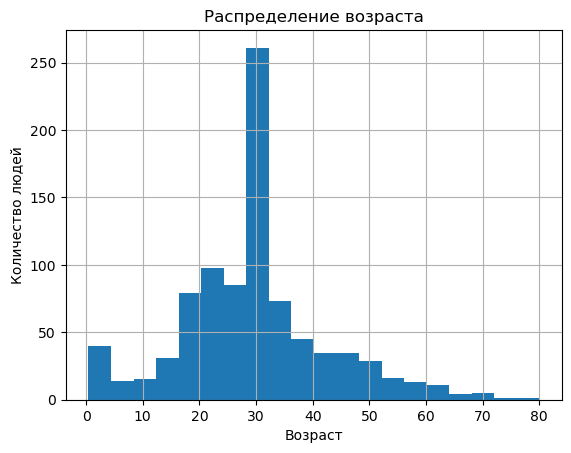

In [49]:
import matplotlib.pyplot as plt
df['Age'].hist(bins=20)
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.title('Распределение возраста')
plt.show()

In [50]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.415301
1    28.549912
Name: Age, dtype: float64

In [51]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FamilySize'].value_counts()

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [52]:
df.groupby('FamilySize')['Survived'].mean()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

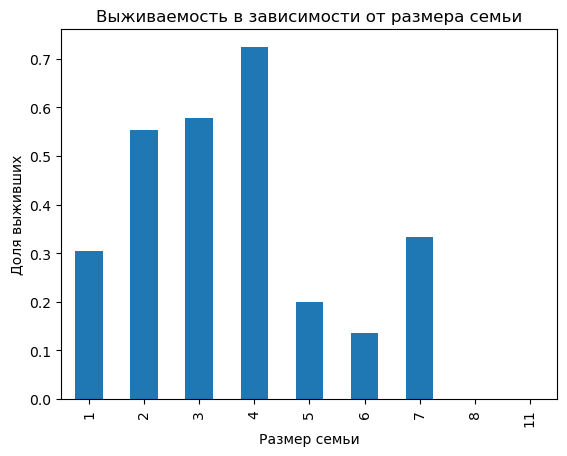

In [53]:
import matplotlib.pyplot as plt
df.groupby('FamilySize')['Survived'].mean().plot(kind='bar')
plt.xlabel('Размер семьи')
plt.ylabel('Доля выживших')
plt.title('Выживаемость в зависимости от размера семьи')
plt.show()

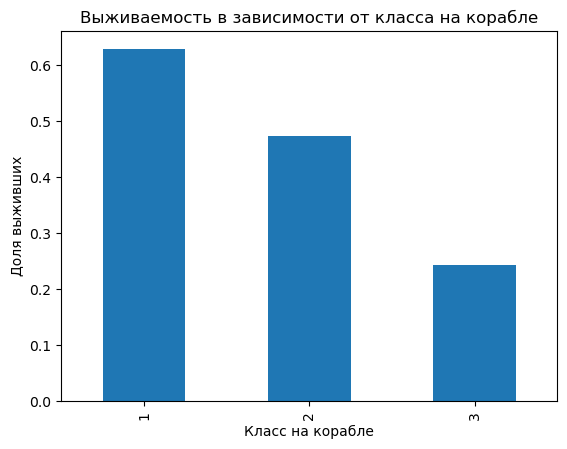

In [54]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.xlabel('Класс на корабле')
plt.ylabel('Доля выживших')
plt.title('Выживаемость в зависимости от класса на корабле')
plt.show()

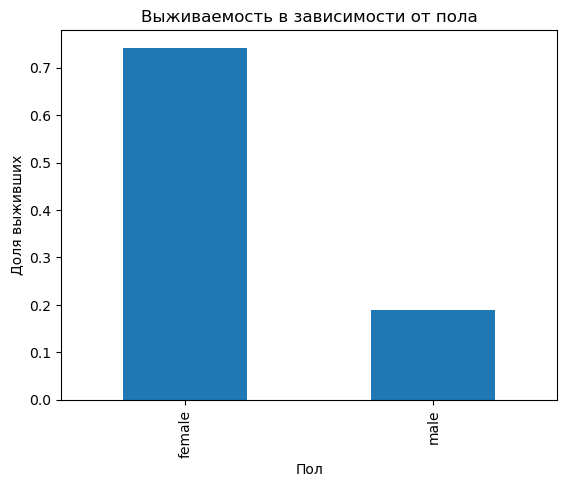

In [55]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.xlabel('Пол')
plt.ylabel('Доля выживших')
plt.title('Выживаемость в зависимости от пола')
plt.show()

In [56]:
df['Survived'].mean()

np.float64(0.3838383838383838)

In [57]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [58]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [59]:
base_prob = round(df['Survived'].mean(), 2)
print(f"Базовая вероятность выживания: {base_prob}")

Базовая вероятность выживания: 0.38


In [60]:
pclass_coef = df.groupby('Pclass')['Survived'].mean() - base_prob
print(f"Коэфициент выживания по классам: {pclass_coef.to_dict()}")

Коэфициент выживания по классам: {1: 0.24962962962962965, 2: 0.09282608695652173, 3: -0.13763747454175154}


In [61]:
sex_coef = df.groupby('Sex')['Survived'].mean() - base_prob
print(f"Коэфициент выживания по полу: {sex_coef.to_dict()}")

Коэфициент выживания по полу: {'female': 0.3620382165605095, 'male': -0.19109185441941076}


In [62]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 16, 60, 100], labels=['child', 'adult', 'senior'])
age_coef = df.groupby('AgeGroup')['Survived'].mean() - base_prob
print(f"Коэфициент выживания по возрастным группам: {age_coef.to_dict()}")

Коэфициент выживания по возрастным группам: {'child': 0.17000000000000004, 'adult': -0.013289986996098846, 'senior': -0.15272727272727274}


/var/folders/2h/tbxv3m5d0lq0_rb87yxcpm0m0000gn/T/ipykernel_20545/3336756330.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_coef = df.groupby('AgeGroup')['Survived'].mean() - base_prob


In [63]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
family_coef = df.groupby('FamilySize')['Survived'].mean() - base_prob
print(f"Коэфициент выживания по размеру семьи: {family_coef.to_dict()}")

Коэфициент выживания по размеру семьи: {1: -0.07646182495344506, 2: 0.17279503105590066, 3: 0.19843137254901966, 4: 0.34413793103448276, 5: -0.18, 6: -0.24363636363636365, 7: -0.04666666666666669, 8: -0.38, 11: -0.38}


In [64]:
def predict_survival_chance(pclass: int, sex: str, age: float, sibsp: int, parch: int) -> float:
    """
    Прогнозирует вероятность выживания пассажира на основе исходных данных.

    ARGS:
        pcclass: int - класс пассажира (1, 2, 3)
        sex: str - пол пассажира (male, female)
        age: float - возраст пассажира
        sibsp: int - количество братьев/сестер/супругов на борту
        parch: int - количество родителей/детей на борту
    
    Returns:
        float - вероятность выживания (от 0 до 1)
    """

    prob = base_prob

    if pclass in pclass_coef:
        prob += pclass_coef[pclass]

    
    if sex in sex_coef:
        prob += sex_coef[sex]

    
    if age < 16:
        group = 'child'
    elif age > 60:
        group = 'senior'
    else:
        group = 'adult'
    if group in age_coef:
        prob += age_coef[group]

    
    family_size = sibsp + parch + 1
    if family_size in family_coef:
        prob += family_coef[family_size]

    prob = max(0, min(1, prob))
    return round(prob, 2)


In [65]:
predict_survival_chance(1, 'male', 25, 0, 0)

np.float64(0.35)

In [66]:
predict_survival_chance(1, 'female', 25, 0, 0)

np.float64(0.9)

In [69]:
predict_survival_chance(3, 'male', 4, 0, 0)

np.float64(0.14)